<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#22회-통계분석" data-toc-modified-id="22회-통계분석-1">22회 통계분석</a></span><ul class="toc-item"><li><span><a href="#회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)-" data-toc-modified-id="회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)--1.1">회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br></a></span><ul class="toc-item"><li><span><a href="#연구가설과-귀무가설을-작성시오" data-toc-modified-id="연구가설과-귀무가설을-작성시오-1.1.1">연구가설과 귀무가설을 작성시오<br></a></span></li><li><span><a href="#가설을-양측-검정-" data-toc-modified-id="가설을-양측-검정--1.1.2">가설을 양측 검정 <br></a></span></li><li><span><a href="#검정통계량,-가설-채택" data-toc-modified-id="검정통계량,-가설-채택-1.1.3">검정통계량, 가설 채택<br></a></span></li></ul></li><li><span><a href="#200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.-" data-toc-modified-id="200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.--1.2">200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br></a></span></li></ul></li></ul></div>

# 22회 통계분석 

#### 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br>
##### 연구가설과 귀무가설을 작성시오<br>
##### 가설을 양측 검정 <br>
##### 검정통계량, 가설 채택<br>


In [41]:
import pandas as pd 
import numpy as np
from scipy import stats

## 데이터 불러오기 
# f = open('C:/Users/LG/Desktop/metalicity.txt','r', encoding='UTF8')
df = pd.read_csv('C:/Users/LG/Desktop/metalicity.csv')

## 가설설정
# H0 : 제조사별로 금속함유량 차이 없다(즉 분산 1.3 = 관측데이터 분산)
# H1 : 제조사별로 금속함유량 차이 있다(즉 분산 1.3 != 관측데이터 분산)


## 정규성검증 (귀무가설 기각 -> 정규성만족)
stats.shapiro(df.values)
#  ==> 관측수 30이상이고 정규성 가정 만족하여 카이제곱 검정 사용

ShapiroResult(statistic=0.9822468757629395, pvalue=0.05002119019627571)

In [42]:
## 카이제곱 검정
def pvar_test(sample, var0, alpha=0.5):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1-rv.cdf(y)) * 2
    print(f'p값: {p:.3f}')
    print(f'검정통계량 값 : {y:.3f}')
    print('임계값 :', interval)

In [43]:
pvar_test(df.values, 1.3, 0.05)

귀무가설 기각
p값: 0.000
검정통계량 값 : 85.182
임계값 : (117.09798286232113, 184.68695493443445)



##### 2. 200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br>
- p관리도 : 전체품목의 표본에서 부적합 부품의 수의 비율 

2.1 p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오<br>

In [44]:
df2 = pd.read_csv('C:/Users/LG/Desktop/lot_quality.csv').set_index('lot')
df2.head()

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15


In [48]:
df2['p'] = df2['불량수량']/df2['생산수량']
df2['lcl'] = df2['p'] - 3*np.sqrt(df2['p']*(1-df2['p'])/df2['생산수량'])
df2['ucl'] = df2['p'] + 3*np.sqrt(df2['p']*(1-df2['p'])/df2['생산수량'])
cl = df2['불량수량'].sum()/df2['생산수량'].sum()

In [49]:
print('관리중심선: ',cl)

관리중심선:  0.029024320840935338


2.2 관리도 시각화 하시오<br>

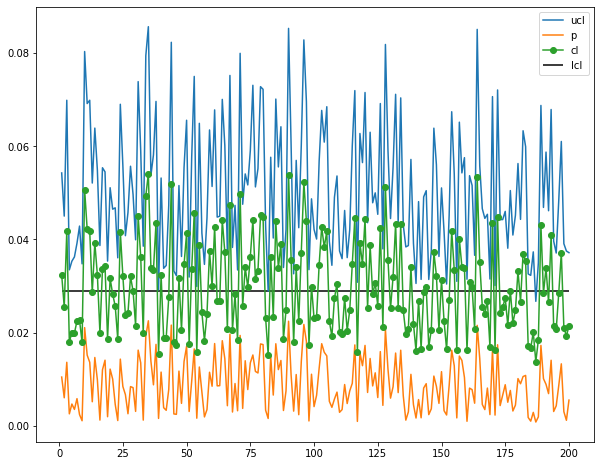

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(df2['ucl'])
plt.plot(df2['lcl'])
plt.plot(df2['p'], marker='o')
plt.hlines(cl, 1, 200)
plt.legend(['ucl','p','cl','lcl'])
plt.show()

3.표에 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라.
재료 공급량 { a: 1300, b: 1000, c:1200 }(10점)



4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']<br>
4.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오<br>
4.2 연구가설 귀무가설 세우시오<br>
4.3 가설 채택하시오

In [53]:
import pandas as pd 

data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df.loc[test_df['product']=='a', 'product']=1
test_df.loc[test_df['product']=='b', 'product']=0
test_df['product']

0     1
1     1
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    1
18    0
19    0
Name: product, dtype: object

In [54]:
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(test_df['product'])

(-1.1144881152070183, 0.26506984027306035)